In [1]:
import numpy as np
from scipy.linalg import eigh 
from floquet_simulations.hamiltonians import SolveSchrodingerTimeIndependent, H0 #(hamiltonian, tspan, nTimesteps, psi0):
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
from pathlib import Path
from floquet_simulations.plot_functions import PlotParams
fontsize=9
PlotParams(fontsize=fontsize)
save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_pres"

In [2]:
N = 800
centre = 400
psi0 = np.zeros(N, dtype=np.complex_); 
psi0[404] = 1
d = 20
alpha = 1
ham = np.diag([-alpha*np.tanh((i-centre-0.5)/d) for i in range(N-1)],-1)+np.diag([-alpha*np.tanh((i - centre)/d) for i in range(N-1)],1)
tspan = (0,200)
n_timesteps = 200
sol = SolveSchrodingerTimeIndependent(ham, tspan, n_timesteps, psi0)
psi = np.array([[np.abs(np.vdot(sol[i,j],sol[i,j]))  for j in range(n_timesteps)]for i in range(N)]) 
max = np.max(psi)



1.3023881458164722e-36 1.0000000000000022


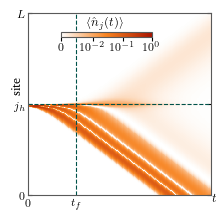

In [5]:
figsize = (6,6)
cm_unit = 1/2.54
colourbar_min = np.min(psi)
colourbar_max = np.max(psi)
print(colourbar_min, colourbar_max)

data_cmap_lims = (-1, 1); colourbar_cmap_lims=(-1,1); colourbar_ticks = [0,1e-2, 1e-1,1]

# norm = mpl.colors.Normalize(vmin=0, vmax=1)
norm=mpl.colors.SymLogNorm(linthresh=1e-3, linscale=1, vmin=0, vmax=1.0, base=10)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', [ "#FFFFFF", 
                                                                #  '#F78320',
                                                                 '#F78320',
                                                                 "#A91401"
                                                                 ], N=256)
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
psi_plot = psi[centre-200:centre+200,:n_timesteps-50]
im = ax.matshow(psi_plot, interpolation='none', cmap=cmap,  norm=norm,aspect="auto")
norm=mpl.colors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=0, vmax=1.0, base=10)

ax.axhline(y=200, color='#005249', linestyle='--', lw=0.8)
ax.axvline(x=39, color='#005249', linestyle='--', lw=0.8)


ax.tick_params(axis="x", bottom=False, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ylabel_coords = (-0.03,0.6)
xlabel_coords = (1.02,0.02)
ax.set_ylabel('site', rotation=90)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks([0,200,400])
ax.set_yticklabels(["$L$", "$j_h$"
, "$0$"])#, font="stix", fontsize=fontsize*0.9)
ax.set_ylim([400,0])

ax.set_xlabel('$t$')
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks([0,39])
ax.set_xticklabels(["$0$", r"$t_f$"])#, font="stix", fontsize=fontsize*0.9)
axins = inset_axes(
    ax,
    width="50%",  # width: 5% of ff width
    height="4%",  # height: 50%
    loc="upper left",
    bbox_to_anchor=(0.18, 0.2, 1, 0.7),
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=axins, orientation="horizontal",ticks=colourbar_ticks, ticklocation="bottom")
# cbar.set_label("$|\psi(x,t)|^2$",loc="top")
cbar.ax.set_title(r"$\langle \hat{n}_j(t)\rangle $",fontsize=fontsize,loc="center",x=0.5,y=0.4,rotation=0)
# set_label_coords(xlabel_coords[0], xlabel_coords[1])
cbar.ax.tick_params(labelsize=fontsize*0.9, pad=1, direction="out")
fig.savefig(save_dir/"BH_tanh_dynamics.png", format="png", bbox_inches="tight", pad_inches=0.02,transparent=True,dpi=1000)
plt.show()

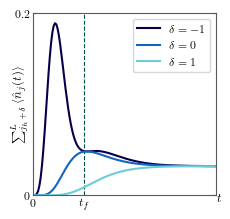

In [6]:
n_time_plot = n_timesteps-60
psi_inside2 = np.sum(psi[centre-200:centre+1,:n_time_plot], axis=0)
psi_inside = np.sum(psi[centre-200:centre+2,:n_time_plot], axis=0)
psi_horizon= np.sum(psi[centre-200:centre+3,:n_time_plot], axis=0)
psi_outside= np.sum(psi[centre-200:centre+4,:n_time_plot], axis=0)
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
tf = 39
# plt.axvline(x = 17, color = '0.1', label = '_nolabel')
ax.axvline(x=tf, color='#005249', linestyle='--', lw=0.8)
colour3 = "#06004B"
colour2 = "#1565C0"
colour1 = "#6CCCDA"
# colour4 = "#FAC575"
# colour2 = ='#F78320'
# colour3 = "#A91401"
# ax.plot(range(n_time_plot), psi_outside, label="$\delta < 0$", color=colour3)

ax.plot(range(n_time_plot), psi_horizon, label="$\delta =-1$",color=colour3)
ax.plot(range(n_time_plot), psi_inside, label="$\delta = 0$", color=colour2)
ax.plot(range(n_time_plot), psi_inside2, label="$\delta =1$", color=colour1)


ax.tick_params(axis="x", bottom=False, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_ylabel(r"$\sum_{j_h + \delta}^{L} \>  \langle \hat{n}_j(t) \rangle$", rotation=90)
ax.set_ylim([0,0.21])
ax.yaxis.set_label_coords(ylabel_coords[0],0.5)
ax.set_yticks([0,0.21])
ax.set_yticklabels(["$0$", "$0.2$"])#, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel('$t$')
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks([0,tf])
ax.set_xlim([0,n_time_plot])
ax.set_xticklabels(["$0$", r"$t_f$"])#, font="stix", fontsize=fontsize*0.9)
ax.legend()

fig.savefig(save_dir/"BH_tanh_integrated_psi.png", format="png", bbox_inches="tight", pad_inches=0.01,transparent=True,dpi=600)
# fig.savefig(Path().absolute().parent.parent/"figures"/"thesis"/"black_hole"/"BH_tanh_integrated_psi.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01,transparent=True)
plt.show()



1.3023881458164722e-36 1.0000000000000022


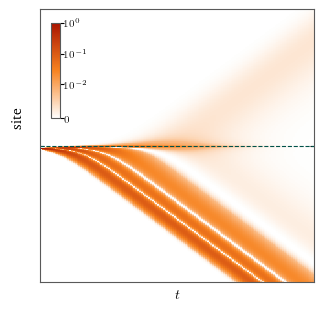